<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_2_12_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_%EC%86%90%EC%88%98_%EC%84%A4%EA%B3%84%ED%95%98%EB%8A%94_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%88%98%EC%B9%98%EB%A5%BC_%EB%A7%9E%EC%B6%B0%EB%B3%B4%EC%9E%90!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

[공유]
[https://colab.research.google.com/drive/12MZvXUfhFTQv_MV2H05FO1XT-TdzMTbN?usp=sharing](https://colab.research.google.com/drive/12MZvXUfhFTQv_MV2H05FO1XT-TdzMTbN?usp=sharing)

---
● 회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀(Multi Regression Model)

https://yhyun225.tistory.com/11

---

---
### (1) 데이터 가져오기
* sklearn.datasets 의 load_diabetes 에서 데이터를 가져와 주세요.
* diabetes 의 data 를 df_X 에, target 을 df_y 에 저장해 주세요.
---

#### (1-1) sklearn.datasets 의 load_diabetes 에서 데이터를 가져와 주세요.

In [588]:
from sklearn.datasets import load_diabetes

In [589]:
diabetes = load_diabetes()

In [590]:
type(diabetes)

sklearn.utils.Bunch

In [591]:
# 데이터셋을 대충 보기
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [592]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [593]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [594]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [595]:
# 내용 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [596]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [597]:
for i, feature_name in enumerate(diabetes.feature_names):
    print("feature {} {}".format(i+1, feature_name))
    #print('feature', i+1, feature_name)

feature 1 age
feature 2 sex
feature 3 bmi
feature 4 bp
feature 5 s1
feature 6 s2
feature 7 s3
feature 8 s4
feature 9 s5
feature 10 s6


    * [10가지 속성]
        - age     (나이)
        - sex     (성별)
        - bmi     body mass index (BMI: 체질량지수)
        - bp      average blood pressure (평균 혈압)
        - s1      tc, total serum cholesterol (혈청 콜레스테롤)
        - s2      ldl, low-density lipoproteins (저밀도 지단백질)
        - s3      hdl, high-density lipoproteins (고밀도 지단백질)
        - s4      tch, total cholesterol / HDL (총 콜레스테롤)
        - s5      ltg, possibly log of serum triglycerides level (혈청 트리글리세리드 수준의 가능한 로그)
        - s6      glu, blood sugar level (혈당 수치)

In [598]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [599]:
data = diabetes.data

In [600]:
# diabetes 의 data 는 2차원
data.shape

(442, 10)

10가지 속성을 가진, 442명 분의 데이터

In [601]:
type(data)

numpy.ndarray

In [602]:
# 첫 번째 사람의 데이타 보기
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

#### (1-2) diabetes 의 data 를 df_X 에, target 을 df_y 에 저장해 주세요.

###### pandas

In [603]:
import pandas as pd

In [604]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [605]:
type(diabetes.feature_names)

list

###### df_X 에 저장

In [606]:
df_X = pd.DataFrame(data=data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [607]:
type(df_X)

pandas.core.frame.DataFrame

###### df_y 에 저장

In [608]:
type(diabetes.target)

numpy.ndarray

In [609]:
# diabetes 에서,  data 는 2차원인 반면, target 은 1차원이다.
diabetes.target.shape

(442,)

In [610]:
# columns 에는 list 형식으로 넣어야 한다.
df_y = pd.DataFrame(data=diabetes.target, columns=['label'])
df_y

,label
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [611]:
type(df_y)

pandas.core.frame.DataFrame

In [612]:
# diabetes 의 target 은 1차원 인데,
# pandas 로 읽어들이니, 2차원으로 바뀌었다.
df_y.shape

(442, 1)

---
### (2)  모델에 입력할 데이터 X 준비하기
* df_X 에 있는 값들을 numpy array로 변환해서 저장해 주세요.
---

In [613]:
# diabetes = load_diabetes() 하면, sklearn.utils.Bunch 로 나오는데,
# data 와 target 은 numpy.ndarray 이므로,
# pandas에서 읽어서 .values 로 다시 numpy.ndarray 로 바꿀 필요는 없지만......
'''
diabetes = load_diabetes()
X = diabetes.data
type(X)
'''

'\ndiabetes = load_diabetes()\nX = diabetes.data\ntype(X)\n'

In [614]:
df_X.loc[:, 'age':'s6']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [615]:
X = df_X.loc[:, 'age':'s6'].values

In [616]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [617]:
X.shape

(442, 10)

In [618]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [619]:
type(X)

numpy.ndarray

---
### (3)  모델에 입력할 데이터 y 준비하기
* df_y 에 있는 값들을 numpy array로 변환해서 저장해 주세요.
---

In [620]:
# diabetes = load_diabetes() 하면, sklearn.utils.Bunch 로 나오는데,
# data 와 target 은 numpy.ndarray 이므로,
# pandas에서 읽어서 .values 로 다시 numpy.ndarray 로 바꿀 필요는 없었다.
'''
diabetes = load_diabetes()
y = diabetes.target
type(y)
'''

'\ndiabetes = load_diabetes()\ny = diabetes.target\ntype(y)\n'

In [621]:
# 1차원으로 됨.
y = df_y.loc[:, 'label'].values

In [622]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [623]:
y.shape

(442,)

In [624]:
type(y)

numpy.ndarray

---
### (4) train 데이터와 test 데이터로 분리하기
* x 와 y 데이터를 각각 train 데이타와 test 데이터로 분리해 주세요.
---

In [625]:
# 데이타를 학습과 평가용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('X_train 개수: ', len(X_train))
print('X_test 개수 : ', len(X_test))

(353, 10) (353,)
(89, 10) (89,)
X_train 개수:  353
X_test 개수 :  89


In [626]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [627]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [628]:
y_train, y_test

(array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
        178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
        166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
        104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
        208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
        317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
        107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
        175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
        215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
        225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
        142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
         48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
        279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
        246., 321., 308., 109.,  69., 

---
### (5) 모델 준비하기
* 입력 데이터 개수에 맞는 가중치 W 와 b 를 준비해 주세요.
* 모델함수를 구현해주세요.
---

#### (5-1) 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

In [629]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [630]:
W

array([0.23005472, 0.45801962, 0.02638817, 0.04286585, 0.33273045,
       0.09102473, 0.0908021 , 0.53464949, 0.92834849, 0.92240142])

In [631]:
b

0.9247690425923227

#### (5-2) 모델 함수를 구현해주세요.

In [632]:
### 모델
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기
* 손실함수를 MSE 함수로 정의해 주세요.
---

In [633]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [634]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

---
### (7) 기울기를 구하는 gradient 함수 구하기
* 기울기를 계산하는 gradient 함수를 구현해 주세요.
---

In [635]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [636]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.62316931  -13.74113741 -189.64828754 -142.71125622  -68.33471151
  -56.07321635  127.60195217 -138.99911416 -182.82550331 -123.46885382]
db: -302.4174302406072


---
### (8) 하이퍼 파라미터 인 학습률 설정하기
* 학습률, learning rate 를 설정해 주세요.
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러가지로 설정하며 실험해 보세요.
---

In [637]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.2

---
### (9) 모델 학습하기
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해 주세요.
* 입력하는 데이터인 X 에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
---

In [638]:
losses = []

#for i in range(1, 3001):
for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2901.7223
Iteration 200 : Loss 2896.4559
Iteration 300 : Loss 2894.7880
Iteration 400 : Loss 2893.2760
Iteration 500 : Loss 2891.8541
Iteration 600 : Loss 2890.5151
Iteration 700 : Loss 2889.2536
Iteration 800 : Loss 2888.0650
Iteration 900 : Loss 2886.9448
Iteration 1000 : Loss 2885.8891
Iteration 1100 : Loss 2884.8940
Iteration 1200 : Loss 2883.9561
Iteration 1300 : Loss 2883.0720
Iteration 1400 : Loss 2882.2387
Iteration 1500 : Loss 2881.4532
Iteration 1600 : Loss 2880.7128
Iteration 1700 : Loss 2880.0149
Iteration 1800 : Loss 2879.3570
Iteration 1900 : Loss 2878.7368
Iteration 2000 : Loss 2878.1522
Iteration 2100 : Loss 2877.6012
Iteration 2200 : Loss 2877.0817
Iteration 2300 : Loss 2876.5921
Iteration 2400 : Loss 2876.1306
Iteration 2500 : Loss 2875.6955
Iteration 2600 : Loss 2875.2854
Iteration 2700 : Loss 2874.8988
Iteration 2800 : Loss 2874.5344
Iteration 2900 : Loss 2874.1909
Iteration 3000 : Loss 2873.8671
Iteration 3100 : Loss 2873.5619
Iteration 3200 : 

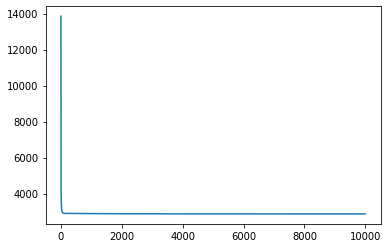

In [639]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [640]:
W, b

(array([  38.15524362, -241.87217667,  543.30485555,  347.43167845,
        -886.16611176,  482.50735942,  143.08708628,  269.06801155,
         718.82880457,   48.99438087]), 151.34334454455245)

---
### (10) test 데이터에 대한 성능 확인하기
* test 데이터에 대한 성능을 확인해 주세요.
---

In [641]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2898.4407228603104

---
### (11) 정답 데이터와 예측한 데이터 시각화 하기
* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화 해주세요.
---

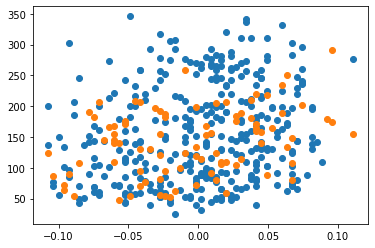

In [642]:
plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_test[:, 0], prediction)
plt.show()

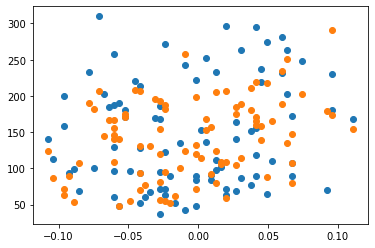

In [643]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

---
---
---
사이킷런 과 비교
---
---
---



In [644]:
from sklearn.datasets import load_diabetes
diabetes_sk = load_diabetes()
data_sk = diabetes_sk.data

In [645]:
import pandas as pd

In [646]:
df_X_sk = pd.DataFrame(data=data_sk, columns=diabetes_sk.feature_names)
# df_y_sk = pd.DataFrame(data=diabetes_sk.target, columns=['label'])

In [647]:
X_sk = df_X_sk.loc[:, 'age':'s6'].values
y_sk = diabetes_sk.target

In [648]:
from sklearn.model_selection import train_test_split
X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(X_sk, y_sk, test_size=0.2, random_state=42)

In [649]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()

print(model_sk._estimator_type)

regressor


In [650]:
# 학습
model_sk.fit(X_sk_train, y_sk_train)

LinearRegression()

In [651]:
# 예측
y_sk_pred = model_sk.predict(X_sk_test)
y_sk_pred

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [652]:
y_sk_pred.shape

(89,)

In [653]:
y_sk_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [654]:
y_sk_test.shape

(89,)

학습용 데이터 자체에서도 절반 정도이므로,
예측치는 학습한대로 결과가 나왔다는 생각이 든다.

In [655]:
model_sk.score(X_sk_train, y_sk_train)

0.5279198995709651

In [656]:
model_sk.score(X_sk_test, y_sk_pred)

1.0

In [657]:
model_sk.score(X_sk_test, y_sk_test)

0.452606602161738

###### RMSE (Root Mean Squared Error)

In [658]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_sk_test, y_sk_pred)
mse

2900.1732878832318

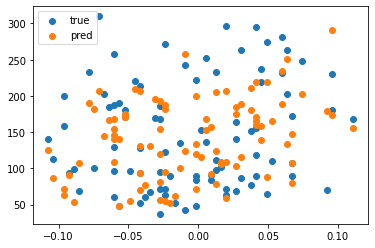

In [659]:
import matplotlib.pyplot as plt
plt.scatter(X_sk_test[:, 0], y_sk_test, label="true")
plt.scatter(X_sk_test[:, 0], y_sk_pred, label="pred")
plt.legend()
plt.show()

In [660]:
X_sk_test[:, 0]

array([ 0.04534098,  0.09256398,  0.06350368,  0.09619652,  0.01264814,
        0.0090156 , -0.00914709, -0.02367725, -0.09269548, -0.06000263,
       -0.04183994,  0.00538306, -0.08906294,  0.01991321, -0.01277963,
       -0.03457486,  0.04170844,  0.06350368, -0.03094232,  0.04897352,
       -0.07090025,  0.04897352, -0.04183994,  0.05987114, -0.06000263,
        0.04170844,  0.03081083,  0.03807591, -0.05637009,  0.01628068,
        0.02717829, -0.10359309, -0.00188202,  0.02717829,  0.09619652,
       -0.07816532, -0.00914709, -0.00188202,  0.06713621,  0.01991321,
       -0.00188202,  0.06713621,  0.04170844,  0.11072668,  0.04170844,
       -0.01641217, -0.09632802,  0.03081083, -0.02004471, -0.06000263,
        0.00538306, -0.09632802,  0.02717829,  0.01991321, -0.05273755,
       -0.02730979, -0.02367725,  0.03807591, -0.02730979, -0.0382074 ,
       -0.02367725, -0.04183994, -0.06000263,  0.01628068, -0.04183994,
        0.07440129, -0.05273755,  0.05260606, -0.10722563, -0.06

---
### 회고
---

    10개의 특성값으로,
    1년 이후 질병 진행에 대한 양적 측정값을 예측하는 문제였습니다.
    선형회귀 문제였지만, 1차원 방정식을 보고 쉽게 생각했다가, 이러한 형태로 나와서 당황하였습니다.

    앞에서 자체적으로 만들었던 함수로 돌려보고,
     아무래도 기본적인 모델이라서 크게 신뢰는 하지 않았고,
    사이킷런은 뭔가 제대로 되어 있을 것이라고 추측하였으나,
    돌려본 결과가 너무 비슷하게 나와서 놀랐습니다.

    혹시, 데이터나 함수가 영향을 주어서,
    같게 나오지는 의심하여,
    완전히 분리하여 돌려보았지만,
    결과가 유사하게 나왔습니다
    